## The main aim of this kernel is to use Linear regression in order to figure out how to maximize the Yearly Amount spent by customers.

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline  

## Importing data

In [7]:
print(os.listdir())
customer_df=pd.read_csv('Ecommerce Customers.csv')
customer_df.head()

['Ecommerce Customers (Linear Regression).ipynb', 'Ecommerce Customers.csv']


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Exploring data

In [8]:
customer_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Lets Start Exploring the data to learn more..

In [11]:
sns.set_palette('GnBu_r')

## Comparing time spent on the site and amount of money spent yearly


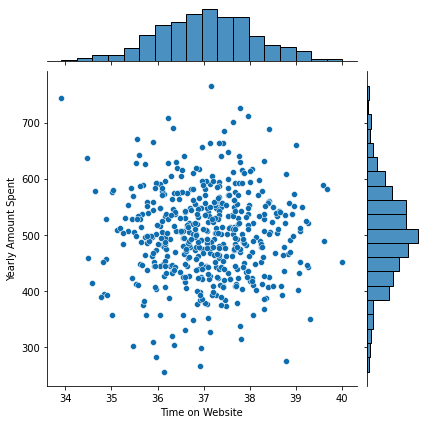

In [12]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customer_df)
plt.show()

## Comparing time spent on the app and amount of money spent yearly

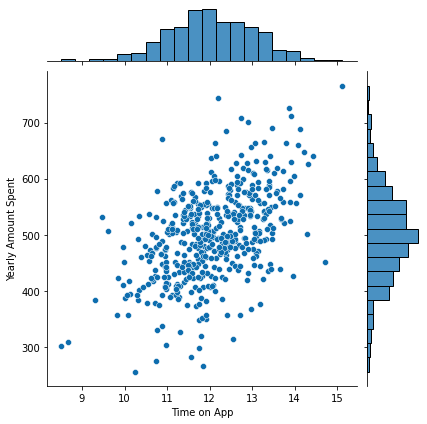

In [13]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customer_df)
plt.show()

## Lets Compare the time spent on the app and the length of membership

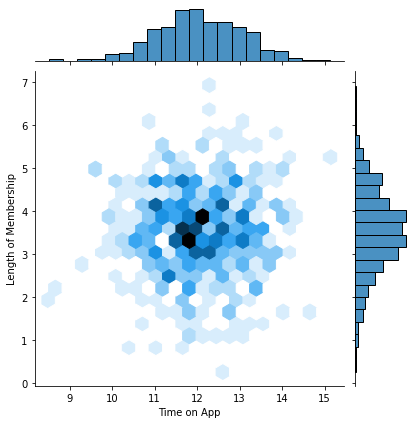

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customer_df,kind='hex')
plt.show()

## Lets Compare the time spent on the website and the length of membership

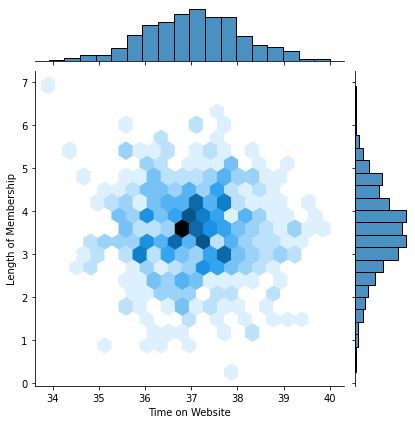

In [15]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=customer_df,kind='hex')
plt.show()

## We could simply explore similar relationships across the data by creating pairplot

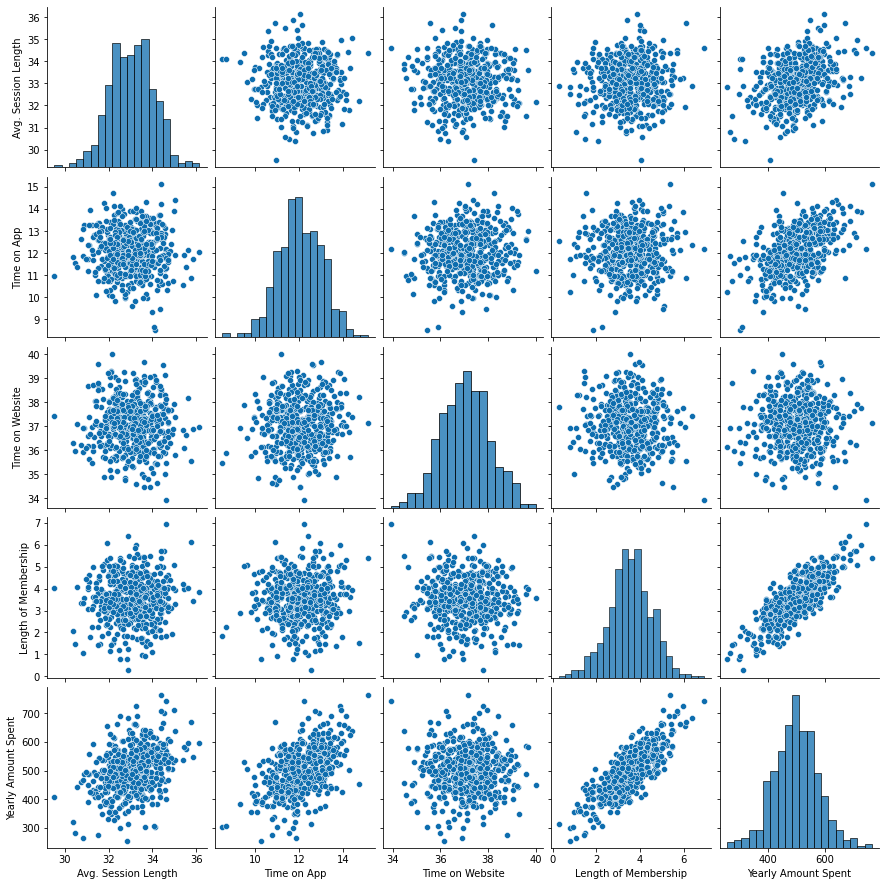

In [16]:
sns.pairplot(customer_df)
plt.show()

## From the pairplot above we can observe that the length of membership is most closely related to the yearly amount spent by the consumers.

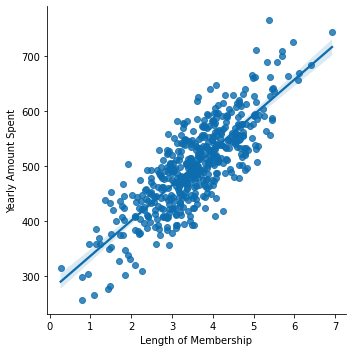

In [17]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customer_df)
plt.show()

## Lets Split the data into training and testing set. We will set'y' as the Yearly Amount Spent and 'X' will be the numerical features related to the customers from the data

In [18]:
X=customer_df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customer_df['Yearly Amount Spent']

## Train-test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [21]:
#creating and training the model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
#coefficients of the model
print('Coefficients: \n',lm.coef_)

Coefficients: 
 [25.88395636 38.51520571  0.57510724 61.49017177]


## Now that we have our fit model lets see how well we can predict the test values

In [22]:
predictions = lm.predict(X_test)

## Lets create a scatter plot of real test values vs the predicted values

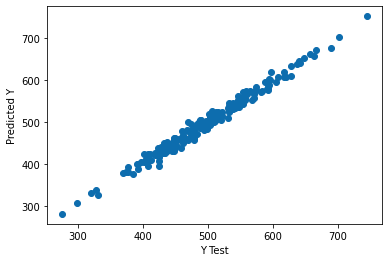

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Now lets evaluate the model

In [24]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  8.248206968698353
MSE=  99.74067109516027
RMSE=  9.987025137405045


## Now that we have a good model Lets explore the residuals

C:\Users\shrad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


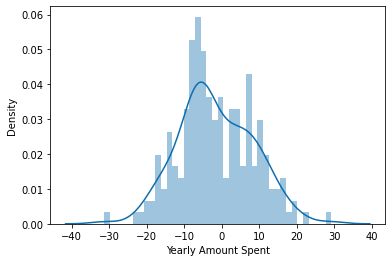

In [25]:
sns.distplot((y_test-predictions),bins=40);

## Now lets figure out how we can boost the yearly amount spent by the customers

In [52]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'] )
cdf

,Coeff
Avg. Session Length,25.883956
Time on App,38.515206
Time on Website,0.575107
Length of Membership,61.490172


## We can interpret this data to make certain observations, for example:- If all other factors are kept constant then increasing the "Avg. Session Length" by one unit will increase the yearly amount spent by a customer by an estimate of $26.

## Similarly increasing "Time on App" by one unit increases yearly amount spent by $38.5  whereas, increasing Time on Website by one unit increases yearly amount spent by only $0.6 approximately.

## According to the data above the largest increase of approximately $61.5 is observed when the "Length of Membership" is increased by one unit.

## Using the predictions above we can develop ways in order to increase yearly amount spent by the customers. We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time.
